In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

π = np.pi
t_0 = 13.78e9      # in units of years
t =   13.78e9        # in units of years , let t=t_0 (i.e. calcluating the merger rate today)
σ_eq = 0.005


m_1 = 6
m_2 = 8

y_1=math.log(m_1)
y_2=math.log(m_2)
dy=(y_2-y_1)


y_list=np.zeros(10)

for i in range(len(y_list)):
    y_list[i]= (y_1 + (i*dy))
    

M_1_list=np.zeros(len(y_list))
M_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i]=(math.ceil(math.exp(y)))
    M_2_list[i]=(math.ceil(math.exp(y)))
    

            
m_1_list=[int(M_1) for M_1 in M_1_list]
m_2_list=[int(M_2) for M_2 in M_2_list]

    
Δ_1_list=np.zeros(len(y_list))
Δ_2_list=np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = math.exp(y + 0.5*dy)-math.exp(y - 0.5*dy)
    Δ_2_list[i] = math.exp(y + 0.5*dy)-math.exp(y - 0.5*dy) 
  


print(m_1_list)

[6, 8, 11, 15, 19, 26, 34, 45, 60, 80]


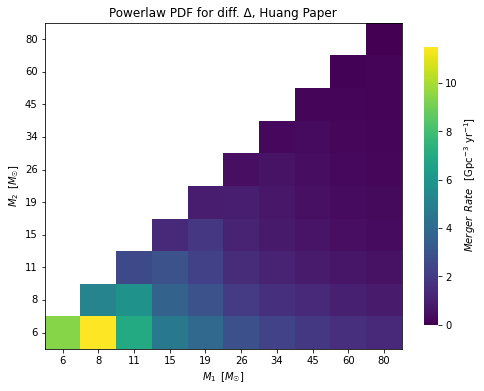

In [2]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.



# merger rate 
def R_power(m_1, m_2, Δ_1, Δ_2, t):
    
    f_pbh = 4.3e-3
    f = 0.85*f_pbh 
    
    def P(m):     #Powerlaw PBH mass distribution
        α = 1.6
        M = 5       #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    return 3.9e6 * (f**2) *((t/t_0)**(-34/37))* ((f**2 + σ_eq**2)**(-21/74)) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2) * ((m_1*m_2)**(3/37)) * ((m_1+m_2)**(36/37))
    
    
Merge = np.zeros((10,10))


for i in range(10):
    for j in range(10):
        if i==j:
            Merge[i, j] = 0.5*R_power(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],t)
            
        else:
            Merge[i, j] = R_power(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j],t)
            



mask = np.tril(np.ones((10,10)),k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6))  

ax = sns.heatmap(Merge, mask=mask,  cmap='viridis', cbar=True,
                 cbar_kws={"shrink": 0.85,'label': ' $Merger\hspace{0.5}Rate \hspace{0.5}$ [Gpc$^{-3}$ yr$^{-1}$]'},
                 vmin=0)





ax.set_xticklabels(m_1_list)
ax.set_yticklabels(m_2_list,rotation = 360)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)


    
ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.title('Powerlaw PDF for diff. Δ, Huang Paper')
plt.savefig('Huang, Powerlaw,diff Δ.pdf')
plt.show()     

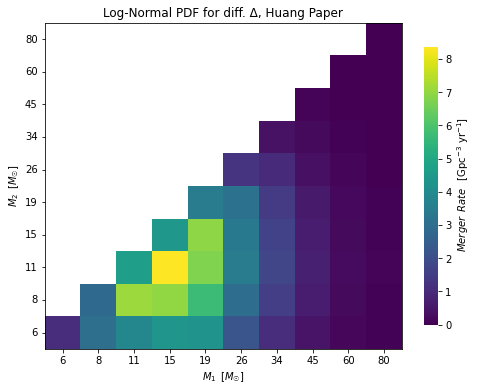

In [3]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.


# merger rate 
def R_lognormal(m_1, m_2, Δ_1, Δ_2, t):
    
    f_pbh = 3.7e-3
    f = 0.85*f_pbh   
    
    def Q(m):               #Log-Normal PBH mass Distributions
        σ=0.6
        m_c=15               #in units of M☉
        return (1/(σ * m * math.sqrt(2*π))) * math.exp(-((math.log(m/m_c))**2)/(2*(σ**2)))

    return 3.9e6 * (f**2) *((t/t_0)**(-34/37))* ((f**2 + σ_eq**2)**(-21/74)) * np.minimum((Q(m_1)*Δ_1)/m_1, (Q(m_2)*Δ_2)/m_2) * ((Q(m_1)*Δ_1)/m_1 + (Q(m_2)*Δ_2)/m_2) * ((m_1*m_2)**(3/37)) * ((m_1+m_2)**(36/37))
    



    
    
Merger = np.zeros((10, 10))


for i in range(10):
    for j in range(10):
        if i==j:
            Merger[i, j] = 0.5*R_lognormal(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t)
            
        else:
            Merger[i, j] = R_lognormal(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t)
            

            


mask = np.tril(np.ones((10,10)),k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6))  

ax = sns.heatmap(Merger, mask=mask,  cmap='viridis', cbar=True, 
                 cbar_kws={"shrink": 0.85,'label': ' $Merger\hspace{0.5}Rate \hspace{0.5}$ [Gpc$^{-3}$ yr$^{-1}$]'},
                 vmin=0)



ax.set_xticklabels(m_1_list)
ax.set_yticklabels(m_2_list,rotation = 360)


# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)

ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.title('Log-Normal PDF for diff. Δ, Huang Paper')
plt.savefig('Huang, Log-Normal PDF for diff Δ.pdf')
plt.show()     

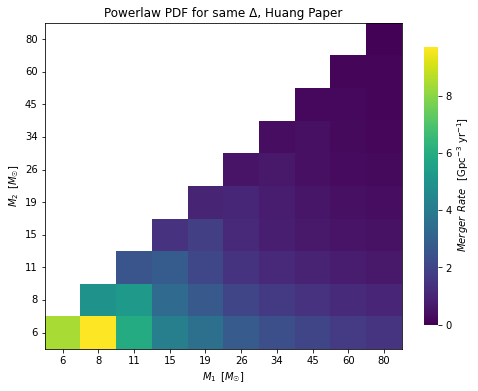

In [4]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2 with Δ_1=Δ_2=Δ.


# merger rate 
def Merger_power(m_1, m_2, t):
    
    f_pbh = 0.013
    f = 0.85*f_pbh
    
    def P(m):     #Powerlaw PBH mass distribution
        α = 1.5
        M = 1       #in units of M☉
        return ((α-1)/M) * ((m/M)**(-α))

    
    return 3.9e6 * (f**2) *((t/t_0)**(-34/37))* ((f**2 + σ_eq**2)**(-21/74)) * np.minimum((P(m_1))/m_1, (P(m_2))/m_2) * ((P(m_1))/m_1 + (P(m_2))/m_2) * ((m_1*m_2)**(3/37)) * ((m_1+m_2)**(36/37))
    
    
Merge_12 = np.zeros((10, 10))


for i in range(10):
    for j in range(10):
        if i==j:
            Merge_12[i, j] = 0.5 * Merger_power(m_1_list[i], m_2_list[j], t) * Δ_1_list[i] * Δ_2_list[j]
            
        else:
            Merge_12[i, j] = Merger_power(m_1_list[i], m_2_list[j], t) * Δ_1_list[i] * Δ_2_list[j]
            



mask = np.tril(np.ones((10,10)),k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6))  

ax = sns.heatmap(Merge_12, mask=mask,  cmap='viridis', cbar=True,
                 cbar_kws={"shrink": 0.85,'label': ' $Merger\hspace{0.5}Rate \hspace{0.5}$ [Gpc$^{-3}$ yr$^{-1}$]'},
                 vmin=0)




ax.set_xticklabels(m_1_list)
ax.set_yticklabels(m_2_list,rotation = 360)

# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)


    
ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.title('Powerlaw PDF for same Δ, Huang Paper')
plt.savefig('Huang, Powerlaw PDF for same Δ.pdf')
plt.show()     

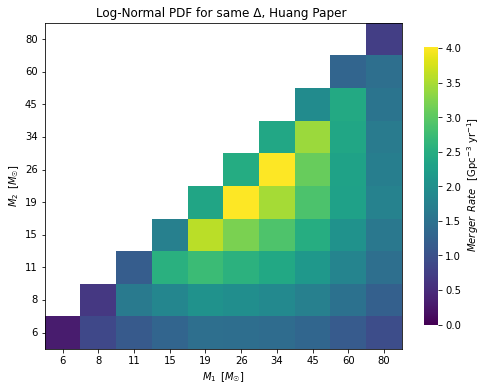

In [5]:
# Calculation of the 2D merger rate for Log-Normal PBH mass Distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2 with Δ_1=Δ_2=Δ.






def Merger_lognormal(m_1, m_2, t):
    
    f_pbh = 0.0067
    f = 0.85*f_pbh
    
    def Q(m):               #Log-Normal PBH mass Distribution
        σ=1
        m_c=40               #in units of M☉
        return  (1/(σ * m * math.sqrt(2*π))) * math.exp(-(((math.log(m/m_c))**2)/(2*(σ**2))))


    
    return 3.9e6 * (f**2) *((t/t_0)**(-34/37))* ((f**2 + σ_eq**2)**(-21/74)) * np.minimum((Q(m_1))/m_1, (Q(m_2))/m_2) * ((Q(m_1))/m_1 + (Q(m_2))/m_2) * ((m_1*m_2)**(3/37)) * ((m_1+m_2)**(36/37))
    
    
Merger_12 = np.zeros((10, 10))


for i in range(10):
    for j in range(10):
        if i==j:
            Merger_12[i, j] = 0.5*Merger_lognormal(m_1_list[i], m_2_list[j], t) * Δ_1_list[i] * Δ_2_list[j]
            
        else:
            Merger_12[i, j] = Merger_lognormal(m_1_list[i], m_2_list[j], t) * Δ_1_list[i] * Δ_2_list[j]
            



mask = np.tril(np.ones((10,10)),k=-1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax= plt.subplots(figsize=(8, 6))  

ax = sns.heatmap(Merger_12, mask=mask,  cmap='viridis', cbar=True,
                 cbar_kws={"shrink": 0.85,'label': ' $Merger\hspace{0.5}Rate \hspace{0.5}$ [Gpc$^{-3}$ yr$^{-1}$]'},
                 vmin=0)



ax.set_xticklabels(m_1_list)
ax.set_yticklabels(m_2_list,rotation = 360)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)


    
ax.invert_yaxis()
plt.xlabel('$M_{1}\hspace{0.5}[M_{☉}]$')
plt.ylabel('$M_{2}\hspace{0.5}[M_{☉}]$')
plt.title('Log-Normal PDF for same Δ, Huang Paper ')
plt.savefig('Huang, Log-Normal PDF for same Δ.pdf')
plt.show()     